In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import scatter_matrix


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정만 다시 실행합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [5]:
ab_assignment = pd.read_csv('/content/ab_assignment.csv')
campaigns = pd.read_csv('/content/campaigns.csv')
chat_events = pd.read_csv('/content/chat_events.csv')
event_logs = pd.read_csv('/content/event_logs.csv')
payment_transactions = pd.read_csv('/content/payment_transactions.csv')
plan_history = pd.read_csv('/content/plan_history.csv')
push_events = pd.read_csv('/content/push_events.csv')
referral_events = pd.read_csv('/content/referral_event.csv')
users = pd.read_csv('/content/users.csv')

In [6]:
pd.read_csv('referral_event.csv')

,referrer_user_id,referred_user_id,referral_time,referral_code
0,usr_6b87a57bd775,usr_999627af31c9,2025-01-03 07:00:00,rf_2dc98f20
1,usr_065a57484a03,usr_97c482c5ea09,2024-12-04 19:23:00,rf_323a083c
2,usr_b783533a534b,usr_039406094001,2025-01-14 15:12:00,rf_9b6ed228
3,usr_999627af31c9,usr_baae86ef556b,2025-02-15 11:50:00,rf_50e5a02d
4,usr_2b0c7bbc467f,usr_2752111a2aa5,2024-12-22 02:32:00,rf_86fb7f63
...,...,...,...,...
2262,usr_049ac3f418a2,usr_177122a8539c,2025-07-21 22:37:04,rf_a82a571b
2263,usr_784946e225a8,usr_76a0bb0dc0e3,2025-07-21 01:50:48,rf_8169303b
2264,usr_d193b78c80b5,usr_76793da473d3,2025-07-21 06:04:42,rf_d7fa39cd
2265,usr_45ffa0c28baa,usr_55171f0dee7e,2025-07-21 12:06:18,rf_7c6d4e6e


In [7]:
users['user_id'].drop_duplicates()

,user_id
0,usr_6b87a57bd775
1,usr_b95ee57a273a
2,usr_fc7ffc4130f7
3,usr_f0dbe9c02021
4,usr_6f08473e5134
...,...
22540,usr_7c2e7de25487
22541,usr_53fc5b5c27e3
22542,usr_2a0e09d7a5d0
22543,usr_66d96508fcfc


In [8]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [9]:
event_logs['event_name'].unique()

array(['signup_completed', 'lesson_played', 'course_searched',
       'chat_sent', 'page_viewed', 'quiz_submitted',
       'first_quiz_submitted', 'first_lesson_played', 'course_wishlisted',
       'push_sent', 'payment_completed', 'pricing_page_viewed',
       'subscription_canceled', 'onboarding_cta_clicked',
       'checkout_started'], dtype=object)

In [14]:
plan_history

,user_id,change_time,plan_name,plan_status,reason
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user
...,...,...,...,...,...
38994,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38995,usr_01541e4f0d18,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38996,usr_e98984d93027,2025-07-21 00:00:00,NaN,none,trial_expired
38997,usr_e05d48cee001,2025-07-21 00:00:00,NaN,none,trial_expired


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22545 entries, 0 to 22544
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             22545 non-null  object
 1   created_at          22545 non-null  object
 2   last_seen_at        22545 non-null  object
 3   email               22545 non-null  object
 4   acquisition_source  22545 non-null  object
 5   subscription_plan   22545 non-null  object
 6   plan_status         22545 non-null  object
 7   device_type         22545 non-null  object
 8   plan_start_date     7625 non-null   object
 9   plan_end_date       451 non-null    object
 10  gender              22545 non-null  object
 11  age_group           22545 non-null  object
 12  age                 22545 non-null  int64 
 13  campaign_id         22545 non-null  object
 14  utm_source          22545 non-null  object
 15  utm_campaign        22545 non-null  object
dtypes: int64(1), object(15

In [11]:
#유저 획득 경로
users['acquisition_source'].value_counts()

,count
acquisition_source,
organic,4617
google_cpc,4608
referral,4506
facebook_ads,4431
direct,4383


In [12]:
#회원 가입 대비 구독 인원수
#7625명,0.338%(구독률)
df=users['subscription_plan'].value_counts(normalize=True)

In [52]:
#남녀 성비
df=users['gender'].value_counts()

In [14]:
#디바이스 타입별 이용률
users['device_type'].value_counts(normalize=True)

,proportion
device_type,
web,0.336438
ios,0.334753
android,0.328809


In [39]:
users

,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaN,NaN,M,30s,39,cmp_003,google,sem24
1,usr_b95ee57a273a,2024-12-09 20:57:00,2025-07-19 09:29:00,wgim@example.com,referral,annual_pro,active,android,2024-12-16 20:57:00,NaN,M,30s,35,cmp_001,facebook,spring24
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,2025-07-20 12:57:00,coejaeho@example.com,facebook_ads,monthly_pro,active,ios,2025-05-16,NaN,M,10s,16,cmp_003,google,sem24
3,usr_f0dbe9c02021,2025-01-25 11:14:00,2025-07-09 03:16:00,ngim@example.com,google_cpc,monthly_pro,active,android,2025-01-26 11:14:00,NaN,F,40s,48,cmp_001,facebook,spring24
4,usr_6f08473e5134,2025-01-30 02:22:00,2025-07-03 02:55:00,gimujin@example.com,direct,none,none,android,NaN,NaN,M,30s,31,cmp_001,facebook,spring24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,usr_7c2e7de25487,2025-07-21 09:33:26,2025-07-21 09:33:26,caeweoni@example.org,facebook_ads,none,trialing,web,NaN,NaN,F,60s,103,cmp_001,facebook,spring24
22541,usr_53fc5b5c27e3,2025-07-21 14:48:07,2025-07-21 14:48:07,yumyeongja@example.net,referral,none,trialing,ios,NaN,NaN,M,40s,45,cmp_001,facebook,spring24
22542,usr_2a0e09d7a5d0,2025-07-21 15:12:12,2025-07-21 15:12:12,yeongjinsin@example.org,direct,none,trialing,android,NaN,NaN,F,50s,57,cmp_002,referral,ref_buddy
22543,usr_66d96508fcfc,2025-07-21 00:16:38,2025-07-21 00:16:38,anyeongsu@example.com,organic,none,trialing,web,NaN,NaN,M,40s,43,cmp_003,google,sem24


In [43]:
#연령별 이용률
df=users['age_group'].value_counts(normalize=True)

In [45]:
df=users['subscription_plan'].value_counts(normalize=True)

In [46]:
df=users['plan_status'].value_counts(normalize=True)

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d258433a810>,
 [Text(-1.099952768432978, -0.010193488933034059, 'F'),
  Text(1.0999527675418306, 0.01019358509396291, 'M')],
 [Text(-0.5999742373270788, -0.005560084872564031, '50.3%'),
  Text(0.5999742368409984, 0.005560137323979768, '49.7%')])

Text(0.5, 1.0, '성비')

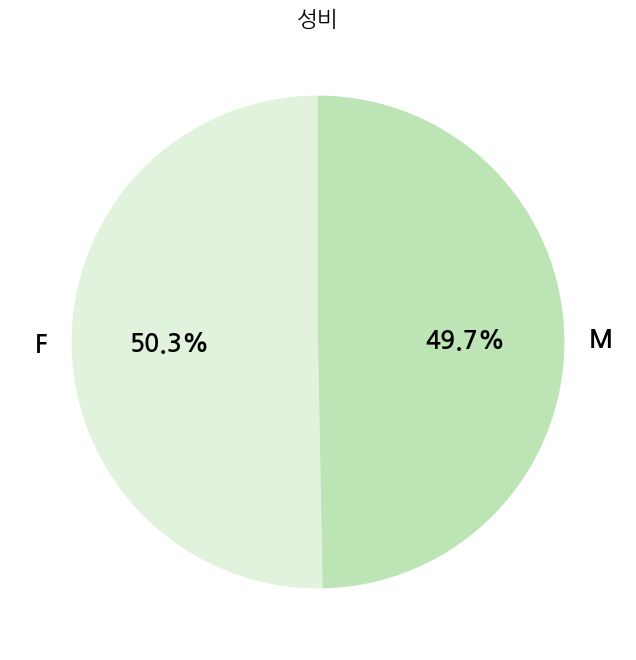

In [54]:
plt.figure(figsize=(8, 8))
plt.pie(
    df.values,
    labels=df.index,
    autopct='%1.1f%%',  # 📌 퍼센트를 소수점 첫째 자리까지 표시
    startangle=90,
    colors=sns.color_palette('Greens'), # 📌 초록색 계열의 그라데이션으로 변경
    textprops={'fontsize': 18, 'color': 'black', 'weight': 'bold'} # 📌 텍스트 색상을 검정색으로 변경하고 볼드체 추가
)
plt.title('성비', fontsize=16)

In [16]:
#유입경로
users['campaign_id'].value_counts()

,count
campaign_id,
cmp_003,7672
cmp_001,7441
cmp_002,7432


In [17]:
#첫 접속이 마지막인 경우
df=users['last_seen_at']==users['created_at']
#0.089
df.value_counts()

,count
False,20689
True,1856


In [18]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [19]:
event_logs['event_name'].value_counts()

,count
event_name,
lesson_played,281218
first_lesson_played,96156
page_viewed,96038
quiz_submitted,81923
course_searched,57228
first_quiz_submitted,56372
signup_completed,22545
pricing_page_viewed,8783
payment_completed,4962


In [20]:
event_logs.loc[event_logs['event_name']=='onboarding_cta_clicked']

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
267462,usr_01d7b1d52602,sess_b8bc42c09cb8,onboarding_cta_clicked,2025-06-01 04:23:46,"{""ab_variant"": ""test""}",ios,"Seoul, South Korea"
268794,usr_e4319f5d4f87,sess_c9b9e8c515b6,onboarding_cta_clicked,2025-06-01 02:35:24,"{""ab_variant"": ""test""}",ios,"Seoul, South Korea"
271037,usr_f54a567e82a9,sess_900ac5133252,onboarding_cta_clicked,2025-06-01 20:33:00,"{""ab_variant"": ""test""}",ios,"Seoul, South Korea"
272753,usr_802d44fd636a,sess_410b0f50dee5,onboarding_cta_clicked,2025-06-01 14:40:00,"{""ab_variant"": ""original""}",ios,"Seoul, South Korea"
274294,usr_a15dd6d8567a,sess_f0191ae1d58f,onboarding_cta_clicked,2025-06-02 12:13:18,"{""ab_variant"": ""test""}",ios,"Seoul, South Korea"
...,...,...,...,...,...,...,...
708424,usr_750950bdd94c,sess_37e480a064f8,onboarding_cta_clicked,2025-07-21 05:57:45,"{""ab_variant"": ""test""}",ios,"Seoul, South Korea"
709386,usr_31f5d7f017cb,sess_79fa5598d5ca,onboarding_cta_clicked,2025-07-21 14:25:12,"{""ab_variant"": ""test""}",ios,"Seoul, South Korea"
710833,usr_656df06f67a4,sess_791ac510ce8d,onboarding_cta_clicked,2025-07-21 17:38:00,"{""ab_variant"": ""test""}",ios,"Seoul, South Korea"
712580,usr_8f21d498da95,sess_e50db4e3f0b6,onboarding_cta_clicked,2025-07-21 14:42:00,"{""ab_variant"": ""original""}",ios,"Seoul, South Korea"


In [21]:
users

,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaN,NaN,M,30s,39,cmp_003,google,sem24
1,usr_b95ee57a273a,2024-12-09 20:57:00,2025-07-19 09:29:00,wgim@example.com,referral,annual_pro,active,android,2024-12-16 20:57:00,NaN,M,30s,35,cmp_001,facebook,spring24
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,2025-07-20 12:57:00,coejaeho@example.com,facebook_ads,monthly_pro,active,ios,2025-05-16,NaN,M,10s,16,cmp_003,google,sem24
3,usr_f0dbe9c02021,2025-01-25 11:14:00,2025-07-09 03:16:00,ngim@example.com,google_cpc,monthly_pro,active,android,2025-01-26 11:14:00,NaN,F,40s,48,cmp_001,facebook,spring24
4,usr_6f08473e5134,2025-01-30 02:22:00,2025-07-03 02:55:00,gimujin@example.com,direct,none,none,android,NaN,NaN,M,30s,31,cmp_001,facebook,spring24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,usr_7c2e7de25487,2025-07-21 09:33:26,2025-07-21 09:33:26,caeweoni@example.org,facebook_ads,none,trialing,web,NaN,NaN,F,60s,103,cmp_001,facebook,spring24
22541,usr_53fc5b5c27e3,2025-07-21 14:48:07,2025-07-21 14:48:07,yumyeongja@example.net,referral,none,trialing,ios,NaN,NaN,M,40s,45,cmp_001,facebook,spring24
22542,usr_2a0e09d7a5d0,2025-07-21 15:12:12,2025-07-21 15:12:12,yeongjinsin@example.org,direct,none,trialing,android,NaN,NaN,F,50s,57,cmp_002,referral,ref_buddy
22543,usr_66d96508fcfc,2025-07-21 00:16:38,2025-07-21 00:16:38,anyeongsu@example.com,organic,none,trialing,web,NaN,NaN,M,40s,43,cmp_003,google,sem24


In [22]:
event_logs['event_properties'].unique()

array(['{"signup_method": "apple"}', '{"signup_method": "naver"}',
       '{"signup_method": "kakao"}', ..., '{"push_id": "push_d29de7a0"}',
       '{"push_id": "push_9d240f47"}', '{"push_id": "push_bfc5bb2e"}'],
      dtype=object)

In [23]:
event_logs.loc[event_logs['user_id']==	'usr_0a9de845444d']

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
97934,usr_0a9de845444d,sess_adccd374effc,signup_completed,2025-05-02 23:37:27,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
191669,usr_0a9de845444d,sess_2d8a66118e14,lesson_played,2025-05-20 20:01:00,"{""course_id"": ""L109"", ""lesson_id"": 2}",android,"Seoul, South Korea"
191670,usr_0a9de845444d,sess_2d8a66118e14,payment_completed,2025-05-20 20:01:22,"{""plan_name"": ""monthly_pro"", ""amount"": 19.99, ...",android,"Seoul, South Korea"
191671,usr_0a9de845444d,sess_2d8a66118e14,course_searched,2025-05-20 20:02:14,"{""search_keyword"": ""soluta"", ""result_count"": 8}",android,"Seoul, South Korea"
191672,usr_0a9de845444d,sess_2d8a66118e14,page_viewed,2025-05-20 20:03:36,"{""page_name"": ""home""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
673597,usr_0a9de845444d,sess_7b2e2e495fd0,first_lesson_played,2025-07-17 13:12:00,"{""course_id"": ""L104""}",android,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [24]:
plan_history['plan_status'].value_counts()

,count
plan_status,
trialing,20149
none,10939
active,7460
canceled,451


In [25]:
plan_history

,user_id,change_time,plan_name,plan_status,reason
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user
...,...,...,...,...,...
38994,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38995,usr_01541e4f0d18,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38996,usr_e98984d93027,2025-07-21 00:00:00,NaN,none,trial_expired
38997,usr_e05d48cee001,2025-07-21 00:00:00,NaN,none,trial_expired


In [26]:
plan_history['user_id'].drop_duplicates()

,user_id
0,usr_6b87a57bd775
1,usr_b95ee57a273a
2,usr_fc7ffc4130f7
3,usr_f0dbe9c02021
4,usr_6f08473e5134
...,...
38735,usr_7c2e7de25487
38736,usr_53fc5b5c27e3
38737,usr_2a0e09d7a5d0
38738,usr_66d96508fcfc


In [27]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [28]:
ab_assignment['experiment_name'].value_counts()

,count
experiment_name,
pricing_ab,879
onboarding_cta,407
checkout_design,131


In [50]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [30]:
df=pd.merge(plan_history,event_logs,how='left',on='user_id')

In [51]:
df

,proportion
plan_status,
none,0.483034
active,0.318208
trialing,0.178754
canceled,0.020004


In [32]:
df['plan_name'].unique()

array([nan, 'annual_pro', 'monthly_pro', 'annual_basic', 'monthly_basic'],
      dtype=object)

In [33]:
df2=df[(df['event_name'] == 'first_lesson_played') | (df['event_name'] == 'lesson_played')]

In [34]:
df2['plan_status']=='active'

,plan_status
1,False
4,False
6,False
9,False
10,False
...,...
1208462,False
1208464,False
1208465,False
1208468,False


In [35]:
df2.loc[df2['user_id']=='usr_6b87a57bd775']

,user_id,change_time,plan_name,plan_status,reason,session_id,event_name,event_timestamp,event_properties,device_type,location
1,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user,sess_2b7c28c6c89e,lesson_played,2025-04-03 10:47:00,"{""course_id"": ""L101"", ""lesson_id"": 19}",web,"Seoul, South Korea"
4,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user,sess_2b7c28c6c89e,first_lesson_played,2025-04-03 10:48:09,"{""course_id"": ""L101""}",web,"Seoul, South Korea"
6,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user,sess_2b7c28c6c89e,lesson_played,2025-04-03 10:51:15,"{""course_id"": ""L110"", ""lesson_id"": 7}",web,"Seoul, South Korea"
9,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user,sess_968e9bf4a58c,first_lesson_played,2025-04-16 15:52:42,"{""course_id"": ""L103""}",web,"Seoul, South Korea"
10,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user,sess_968e9bf4a58c,lesson_played,2025-04-16 15:53:54,"{""course_id"": ""L103"", ""lesson_id"": 10}",web,"Seoul, South Korea"
...,...,...,...,...,...,...,...,...,...,...,...
284081,usr_6b87a57bd775,2025-04-03 00:00:00,NaN,none,trial_expired,sess_1a9945956026,lesson_played,2025-07-09 00:05:16,"{""course_id"": ""L104"", ""lesson_id"": 8}",web,"Seoul, South Korea"
284084,usr_6b87a57bd775,2025-04-03 00:00:00,NaN,none,trial_expired,sess_1a9945956026,first_lesson_played,2025-07-09 00:08:20,"{""course_id"": ""L110""}",web,"Seoul, South Korea"
284086,usr_6b87a57bd775,2025-04-03 00:00:00,NaN,none,trial_expired,sess_1a9945956026,lesson_played,2025-07-09 00:11:00,"{""course_id"": ""L104"", ""lesson_id"": 9}",web,"Seoul, South Korea"
284087,usr_6b87a57bd775,2025-04-03 00:00:00,NaN,none,trial_expired,sess_1a9945956026,lesson_played,2025-07-09 00:11:32,"{""course_id"": ""L110"", ""lesson_id"": 15}",web,"Seoul, South Korea"


In [36]:
df2.loc[df2['user_id']=='usr_ef208d9c8f03']

,user_id,change_time,plan_name,plan_status,reason,session_id,event_name,event_timestamp,event_properties,device_type,location
1133137,usr_ef208d9c8f03,2025-07-10 13:35:27,NaN,trialing,signup,sess_f6a006465844,first_lesson_played,2025-07-21 06:02:00,"{""course_id"": ""L102""}",ios,"Seoul, South Korea"
1133138,usr_ef208d9c8f03,2025-07-10 13:35:27,NaN,trialing,signup,sess_f6a006465844,lesson_played,2025-07-21 06:02:11,"{""course_id"": ""L108"", ""lesson_id"": 16}",ios,"Seoul, South Korea"
1208468,usr_ef208d9c8f03,2025-07-21 00:00:00,NaN,none,trial_expired,sess_f6a006465844,first_lesson_played,2025-07-21 06:02:00,"{""course_id"": ""L102""}",ios,"Seoul, South Korea"
1208469,usr_ef208d9c8f03,2025-07-21 00:00:00,NaN,none,trial_expired,sess_f6a006465844,lesson_played,2025-07-21 06:02:11,"{""course_id"": ""L108"", ""lesson_id"": 16}",ios,"Seoul, South Korea"


In [37]:
# 2. 'event_timestamp' 컬럼을 날짜/시간(datetime) 형식으로 변환합니다.
# 이 과정을 거쳐야 정확한 시간 순서대로 정렬할 수 있습니다.
event_logs['event_timestamp'] = pd.to_datetime(event_logs['event_timestamp'])

# 3. 'user_id'와 'event_timestamp'를 기준으로 데이터를 정렬합니다.
# 이렇게 하면 각 사용자의 활동이 시간 순서대로 나열됩니다.
df_sorted = event_logs.sort_values(by=['user_id', 'event_timestamp'])

# 4. 'user_id'를 기준으로 그룹화한 후, 각 그룹의 마지막 행(가장 최근 활동)을 선택합니다.
# reset_index()를 사용해 user_id를 다시 컬럼으로 만듭니다.
df_last_activity = df_sorted.groupby('user_id').last().reset_index()

# 5. 결과를 출력합니다.
df_last_activity

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_000b8936dfd7,sess_57c1f883c602,lesson_played,2025-07-02 19:10:00,"{""course_id"": ""L107"", ""lesson_id"": 5}",web,"Seoul, South Korea"
1,usr_000d248833e6,sess_22b98d19692e,lesson_played,2025-07-13 10:04:08,"{""course_id"": ""L107"", ""lesson_id"": 1}",web,"Seoul, South Korea"
2,usr_000e72325c7f,sess_ff2ea73d7e15,course_searched,2025-07-09 17:08:36,"{""search_keyword"": ""eos"", ""result_count"": 0}",ios,"Seoul, South Korea"
3,usr_0012b62db505,sess_cd26773d2a90,page_viewed,2025-07-20 04:06:24,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
4,usr_0014750e8701,sess_3c813b6fea83,first_lesson_played,2025-06-03 02:55:56,"{""course_id"": ""L107""}",web,"Seoul, South Korea"
...,...,...,...,...,...,...,...
22540,usr_fff3517fa7f3,sess_d157b235ab0f,quiz_submitted,2025-07-21 16:32:24,"{""quiz_id"": 105, ""is_correct"": true}",ios,"Seoul, South Korea"
22541,usr_fffc47e6c004,sess_4433ff98e34a,first_lesson_played,2025-07-03 14:09:14,"{""course_id"": ""L102""}",ios,"Seoul, South Korea"
22542,usr_fffd521f9d14,sess_d7ed1cfeb404,quiz_submitted,2025-06-19 00:47:45,"{""quiz_id"": 108, ""is_correct"": true}",web,"Seoul, South Korea"
22543,usr_ffff5152c6e3,sess_c2cbf10d9c9e,signup_completed,2025-07-18 19:42:36,"{""signup_method"": ""naver""}",web,"Seoul, South Korea"


In [38]:
df_last_activity['event_properties'].value_counts()

,count
event_properties,
"{""page_name"": ""home""}",3159
{},1972
"{""signup_method"": ""kakao""}",512
"{""signup_method"": ""naver""}",503
"{""signup_method"": ""apple""}",491
...,...
"{""search_keyword"": ""alias"", ""result_count"": 1}",1
"{""search_keyword"": ""at"", ""result_count"": 5}",1
"{""search_keyword"": ""ab"", ""result_count"": 6}",1


In [39]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [40]:
# 1. 'event_logs.csv' 파일을 DataFrame으로 불러옵니다.
df_events = pd.read_csv('event_logs.csv')

# 2. 'event_timestamp' 컬럼을 날짜/시간(datetime) 형식으로 변환합니다.
df_events['event_timestamp'] = pd.to_datetime(df_events['event_timestamp'])

# 3. 'event_timestamp'가 2025년 6월 1일 이후인 행만 필터링합니다.
# '2025-06-01'을 기준으로 크거나 같은 행을 선택합니다.
df_after_june = df_events[df_events['event_timestamp'] >= '2025-06-01']

In [41]:
referral_events

,referrer_user_id,referred_user_id,referral_time,referral_code
0,usr_6b87a57bd775,usr_999627af31c9,2025-01-03 07:00:00,rf_2dc98f20
1,usr_065a57484a03,usr_97c482c5ea09,2024-12-04 19:23:00,rf_323a083c
2,usr_b783533a534b,usr_039406094001,2025-01-14 15:12:00,rf_9b6ed228
3,usr_999627af31c9,usr_baae86ef556b,2025-02-15 11:50:00,rf_50e5a02d
4,usr_2b0c7bbc467f,usr_2752111a2aa5,2024-12-22 02:32:00,rf_86fb7f63
...,...,...,...,...
2262,usr_049ac3f418a2,usr_177122a8539c,2025-07-21 22:37:04,rf_a82a571b
2263,usr_784946e225a8,usr_76a0bb0dc0e3,2025-07-21 01:50:48,rf_8169303b
2264,usr_d193b78c80b5,usr_76793da473d3,2025-07-21 06:04:42,rf_d7fa39cd
2265,usr_45ffa0c28baa,usr_55171f0dee7e,2025-07-21 12:06:18,rf_7c6d4e6e


In [42]:
df=df_after_june['event_name'].value_counts().head(5)

In [43]:
df_with_plan_name = df[df.index.str.contains('plan_name')]

In [44]:
df_with_plan_name.value_counts()

,count
count,


<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-2250227127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette='Greens_d')


<Axes: xlabel='event_name'>

Text(0.5, 1.0, '6,7월 event_name')

Text(0, 0.5, '발생 횟수')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'lesson_played'),
  Text(1, 0, 'first_lesson_played'),
  Text(2, 0, 'page_viewed'),
  Text(3, 0, 'quiz_submitted'),
  Text(4, 0, 'course_searched')])

/tmp/ipython-input-2250227127.py:16: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
/tmp/ipython-input-2250227127.py:16: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
/tmp/ipython-input-2250227127.py:16: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
/tmp/ipython-input-2250227127.py:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
/tmp/ipython-input-2250227127.py:16: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.


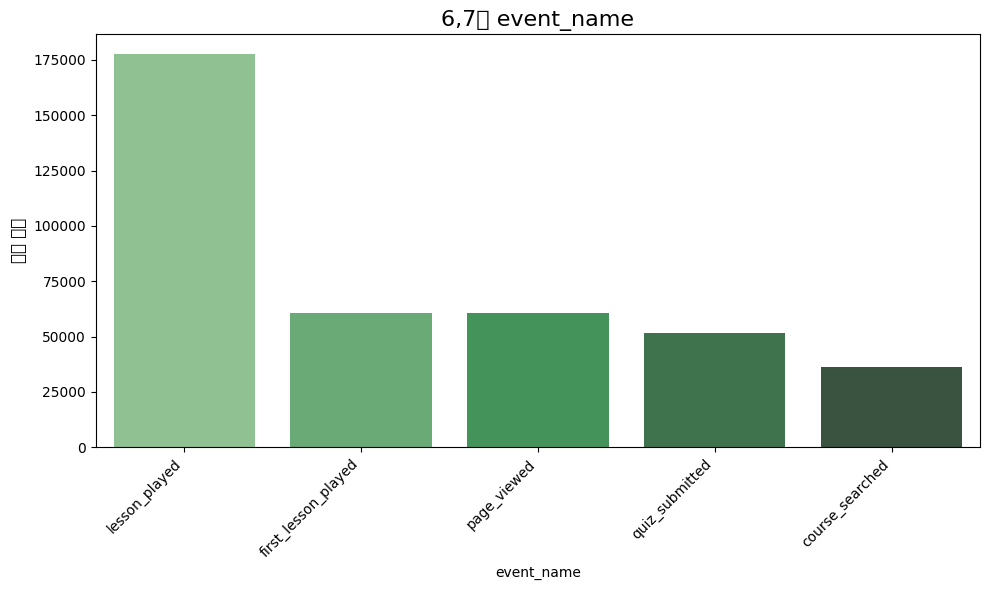

In [45]:
# 1. 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 2. Seaborn으로 막대 그래프 그리기 (초록색 그라데이션 적용)
# x축과 y축 데이터를 명시적으로 지정
sns.barplot(x=df.index, y=df.values, palette='Greens_d')

# 3. 제목과 라벨 설정
plt.title('6,7월 event_name', fontsize=16)  # 제목 설정
plt.ylabel('발생 횟수', fontsize=12)           # y축 라벨 설정

# 4. x축 라벨 회전 및 정렬로 가독성 높이기
plt.xticks(rotation=45, ha='right')

# 5. 그래프 출력
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.show()

In [46]:
plan_history

,user_id,change_time,plan_name,plan_status,reason
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user
...,...,...,...,...,...
38994,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38995,usr_01541e4f0d18,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38996,usr_e98984d93027,2025-07-21 00:00:00,NaN,none,trial_expired
38997,usr_e05d48cee001,2025-07-21 00:00:00,NaN,none,trial_expired


In [47]:
df=(plan_history['plan_status']=='trialing')|(plan_history['reason']=='trial_expired')

In [48]:
event_logs['event_name'].value_counts()

,count
event_name,
lesson_played,281218
first_lesson_played,96156
page_viewed,96038
quiz_submitted,81923
course_searched,57228
first_quiz_submitted,56372
signup_completed,22545
pricing_page_viewed,8783
payment_completed,4962


In [49]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [50]:
event_logs['event_name']=='subscription_canceled'

,event_name
0,False
1,False
2,False
3,False
4,False
...,...
717360,False
717361,False
717362,False
717363,False


In [51]:
df=event_logs[event_logs['event_name'] == 'subscription_canceled']

In [52]:
df=df['event_properties'].value_counts()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='event_properties'>

([<matplotlib.axis.XTick at 0x78dea40ad550>,
 [Text(0, 0, '높은 가격'), Text(1, 0, '충분히 이용하지 않음'), Text(2, 0, '기술 문제')])

Text(0.5, 1.0, '구독 취소 이유')

Text(0, 0.5, '발생 횟수')

Text(0, 83, '83')

Text(1, 83, '83')

Text(2, 82, '82')

/tmp/ipython-input-2576902768.py:30: UserWarning: Glyph 45458 (\N{HANGUL SYLLABLE NOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2576902768.py:30: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2576902768.py:30: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2576902768.py:30: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2576902768.py:30: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2576902768.py:30: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2576902768.py:30: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

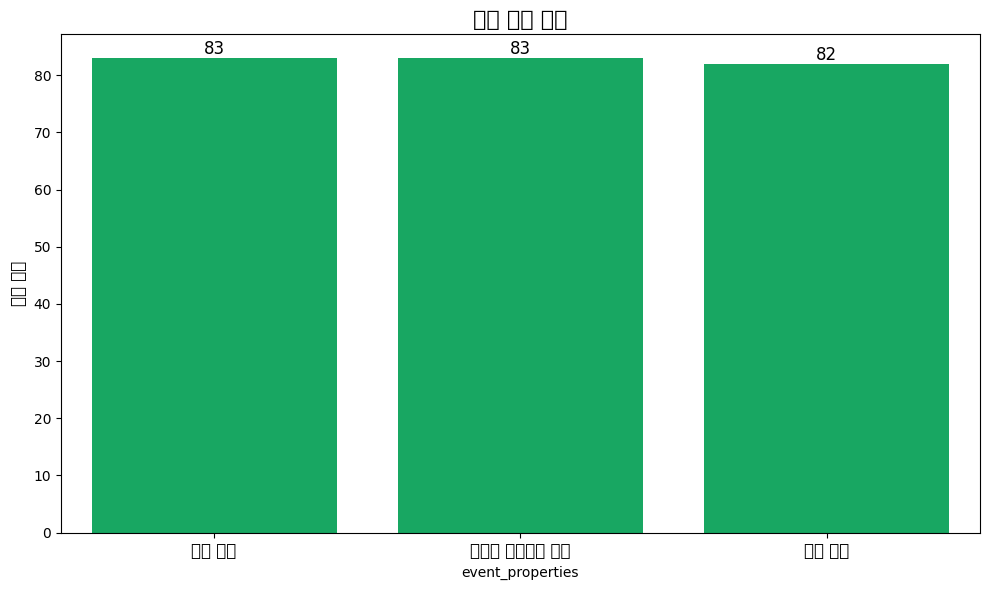

In [53]:


label_mapping = {
    '{"cancel_reason": "too_expensive"}': '높은 가격',
    '{"cancel_reason": "not_using_enough"}': '충분히 이용하지 않음',
    '{"cancel_reason": "technical_issues"}': '기술 문제'
}

# 4. 그래프 크기 설정 및 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df.values, color='#00bf63')

# 5. x축 라벨 변경 및 가독성 설정 (하나의 plt.xticks()로 통합)
# df.index를 'reasons' 변수로 사용
reasons = df.index
new_labels = [label_mapping.get(reason, reason) for reason in reasons]

plt.xticks(ticks=range(len(reasons)), labels=new_labels, rotation=0, fontsize=12)

# 6. 제목과 라벨 설정
plt.title('구독 취소 이유', fontsize=16)
plt.ylabel('발생 횟수', fontsize=12)

for i, count in enumerate(df.values):
    # plt.text(x축 위치, y축 위치, 표시할 텍스트)
    # i: 막대의 인덱스 (0, 1, 2...)
    # count: 막대의 값 (횟수)
    # str(count): 숫자를 문자열로 변환하여 표시
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# 7. 그래프 출력
plt.tight_layout()
plt.show()

In [54]:
users

,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaN,NaN,M,30s,39,cmp_003,google,sem24
1,usr_b95ee57a273a,2024-12-09 20:57:00,2025-07-19 09:29:00,wgim@example.com,referral,annual_pro,active,android,2024-12-16 20:57:00,NaN,M,30s,35,cmp_001,facebook,spring24
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,2025-07-20 12:57:00,coejaeho@example.com,facebook_ads,monthly_pro,active,ios,2025-05-16,NaN,M,10s,16,cmp_003,google,sem24
3,usr_f0dbe9c02021,2025-01-25 11:14:00,2025-07-09 03:16:00,ngim@example.com,google_cpc,monthly_pro,active,android,2025-01-26 11:14:00,NaN,F,40s,48,cmp_001,facebook,spring24
4,usr_6f08473e5134,2025-01-30 02:22:00,2025-07-03 02:55:00,gimujin@example.com,direct,none,none,android,NaN,NaN,M,30s,31,cmp_001,facebook,spring24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,usr_7c2e7de25487,2025-07-21 09:33:26,2025-07-21 09:33:26,caeweoni@example.org,facebook_ads,none,trialing,web,NaN,NaN,F,60s,103,cmp_001,facebook,spring24
22541,usr_53fc5b5c27e3,2025-07-21 14:48:07,2025-07-21 14:48:07,yumyeongja@example.net,referral,none,trialing,ios,NaN,NaN,M,40s,45,cmp_001,facebook,spring24
22542,usr_2a0e09d7a5d0,2025-07-21 15:12:12,2025-07-21 15:12:12,yeongjinsin@example.org,direct,none,trialing,android,NaN,NaN,F,50s,57,cmp_002,referral,ref_buddy
22543,usr_66d96508fcfc,2025-07-21 00:16:38,2025-07-21 00:16:38,anyeongsu@example.com,organic,none,trialing,web,NaN,NaN,M,40s,43,cmp_003,google,sem24


In [55]:
df=event_logs['event_name']=='payment_completed'

In [56]:
users

,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaN,NaN,M,30s,39,cmp_003,google,sem24
1,usr_b95ee57a273a,2024-12-09 20:57:00,2025-07-19 09:29:00,wgim@example.com,referral,annual_pro,active,android,2024-12-16 20:57:00,NaN,M,30s,35,cmp_001,facebook,spring24
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,2025-07-20 12:57:00,coejaeho@example.com,facebook_ads,monthly_pro,active,ios,2025-05-16,NaN,M,10s,16,cmp_003,google,sem24
3,usr_f0dbe9c02021,2025-01-25 11:14:00,2025-07-09 03:16:00,ngim@example.com,google_cpc,monthly_pro,active,android,2025-01-26 11:14:00,NaN,F,40s,48,cmp_001,facebook,spring24
4,usr_6f08473e5134,2025-01-30 02:22:00,2025-07-03 02:55:00,gimujin@example.com,direct,none,none,android,NaN,NaN,M,30s,31,cmp_001,facebook,spring24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,usr_7c2e7de25487,2025-07-21 09:33:26,2025-07-21 09:33:26,caeweoni@example.org,facebook_ads,none,trialing,web,NaN,NaN,F,60s,103,cmp_001,facebook,spring24
22541,usr_53fc5b5c27e3,2025-07-21 14:48:07,2025-07-21 14:48:07,yumyeongja@example.net,referral,none,trialing,ios,NaN,NaN,M,40s,45,cmp_001,facebook,spring24
22542,usr_2a0e09d7a5d0,2025-07-21 15:12:12,2025-07-21 15:12:12,yeongjinsin@example.org,direct,none,trialing,android,NaN,NaN,F,50s,57,cmp_002,referral,ref_buddy
22543,usr_66d96508fcfc,2025-07-21 00:16:38,2025-07-21 00:16:38,anyeongsu@example.com,organic,none,trialing,web,NaN,NaN,M,40s,43,cmp_003,google,sem24


In [57]:
#첫 구독
users['plan_start_date'].isnull().sum()

np.int64(14920)

In [58]:
plan_history

,user_id,change_time,plan_name,plan_status,reason
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user
...,...,...,...,...,...
38994,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38995,usr_01541e4f0d18,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38996,usr_e98984d93027,2025-07-21 00:00:00,NaN,none,trial_expired
38997,usr_e05d48cee001,2025-07-21 00:00:00,NaN,none,trial_expired


In [25]:
plan_history.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38999 entries, 28588 to 31692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      38999 non-null  object        
 1   change_time  38999 non-null  datetime64[ns]
 2   plan_name    7911 non-null   object        
 3   plan_status  38999 non-null  object        
 4   reason       38999 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.8+ MB


In [24]:
plan_history['plan_status']== 'canceled'

,plan_status
28588,False
960,False
26465,False
30496,False
294,False
...,...
29308,False
9586,False
12739,False
36846,False


In [31]:
plan_history

,user_id,change_time,plan_name,plan_status,reason
28588,usr_000b8936dfd7,2025-07-02 06:56:07,NaN,trialing,signup
960,usr_000d248833e6,2025-02-02 12:40:00,annual_pro,active,existing_user
26465,usr_000e72325c7f,2025-06-27 00:06:53,NaN,trialing,signup
30496,usr_000e72325c7f,2025-07-05 00:00:00,annual_pro,active,trial_to_paid
294,usr_0012b62db505,2025-01-27 08:07:00,NaN,none,existing_user
...,...,...,...,...,...
29308,usr_fffc47e6c004,2025-07-03 00:00:00,NaN,none,trial_expired
9586,usr_fffd521f9d14,2025-05-11 18:49:16,NaN,trialing,signup
12739,usr_fffd521f9d14,2025-05-22 00:00:00,NaN,none,trial_expired
36846,usr_ffff5152c6e3,2025-07-18 19:42:36,NaN,trialing,signup


In [48]:
referral_events

,referrer_user_id,referred_user_id,referral_time,referral_code
0,usr_6b87a57bd775,usr_999627af31c9,2025-01-03 07:00:00,rf_2dc98f20
1,usr_065a57484a03,usr_97c482c5ea09,2024-12-04 19:23:00,rf_323a083c
2,usr_b783533a534b,usr_039406094001,2025-01-14 15:12:00,rf_9b6ed228
3,usr_999627af31c9,usr_baae86ef556b,2025-02-15 11:50:00,rf_50e5a02d
4,usr_2b0c7bbc467f,usr_2752111a2aa5,2024-12-22 02:32:00,rf_86fb7f63
...,...,...,...,...
2262,usr_049ac3f418a2,usr_177122a8539c,2025-07-21 22:37:04,rf_a82a571b
2263,usr_784946e225a8,usr_76a0bb0dc0e3,2025-07-21 01:50:48,rf_8169303b
2264,usr_d193b78c80b5,usr_76793da473d3,2025-07-21 06:04:42,rf_d7fa39cd
2265,usr_45ffa0c28baa,usr_55171f0dee7e,2025-07-21 12:06:18,rf_7c6d4e6e
